# **Assignment 5**

# Market Basket Magic: Extracting Insights for Retail Success

## P.N.NIKITHA--21BCI0053


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Loading my dataset
df = pd.read_csv('Mall_Customers.csv')


In [ ]:
# Display basic information about the dataset
print("Basic Info about the Dataset:")
print(df.info())

Basic Info about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print("Shape of the Dataset:")
df.shape

Shape of the Dataset:


(200, 5)

In [ ]:
# Display summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
# Display the first few rows of the dataset
print("\nSample Data:")
print(df.head())


Sample Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

Text(0.5, 0, 'Age')

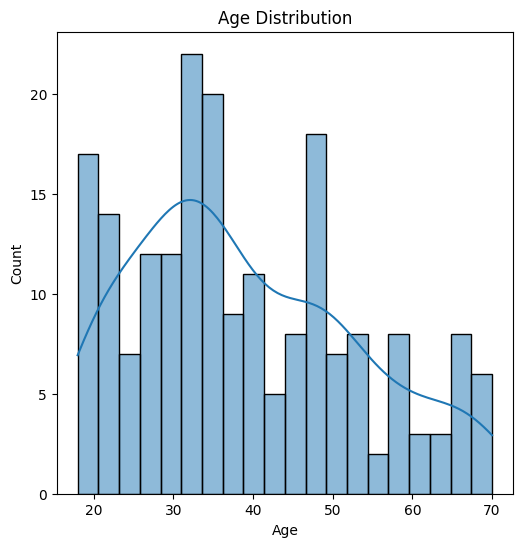

In [ ]:
# Visualize the distribution of numerical columns
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')

Text(0.5, 0, 'Annual Income (k$)')

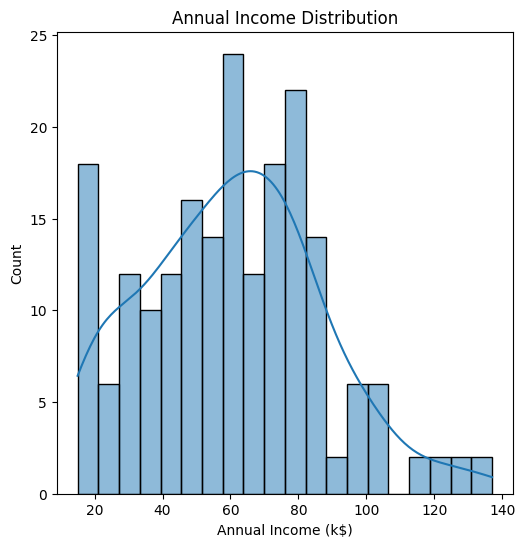

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')


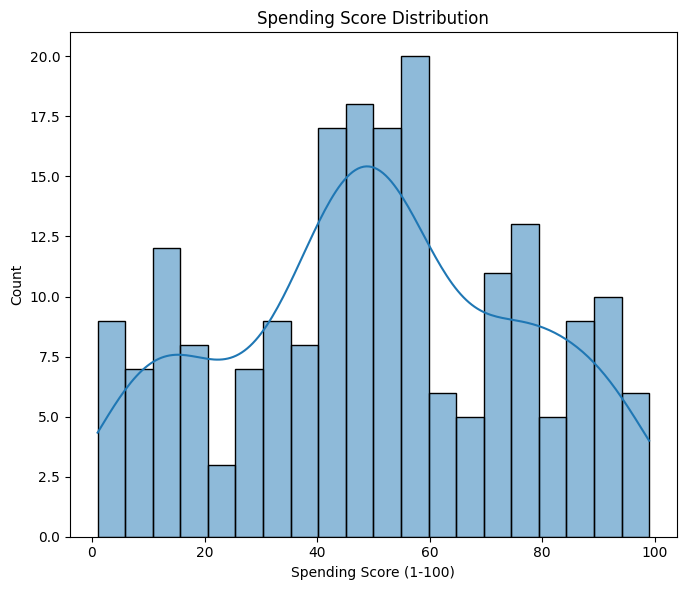

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

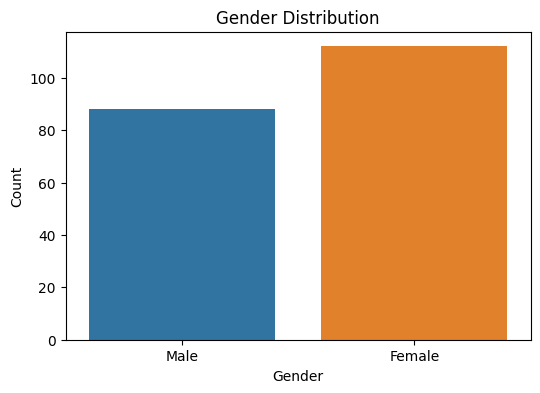

In [ ]:
# Visualize categorical data (e.g., Gender) using a countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Encode categorical features (e.g., Gender) using LabelEncoder
le =LabelEncoder()

df.Gender = le.fit_transform(df.Gender)

df.head()

df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [ ]:
# Check unique values and value counts for categorical columns
print("\nUnique Values and Value Counts for Gender:")
print(df['Gender'].value_counts())


Unique Values and Value Counts for Gender:
0    112
1     88
Name: Gender, dtype: int64


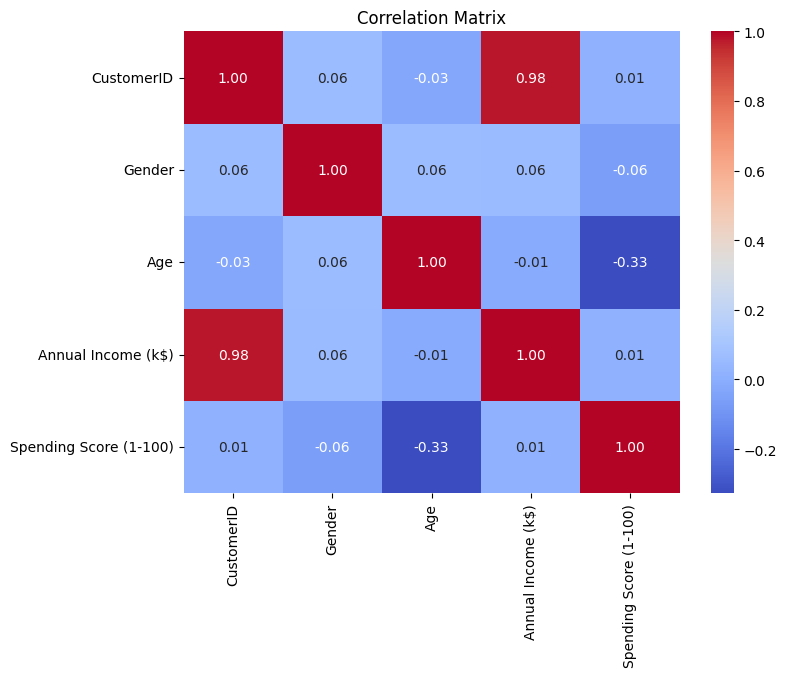

In [ ]:
# Explore correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Encode categorical features (e.g., Gender) using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], prefix=['Gender'])

# Check the updated DataFrame
print("\nPreprocessed Data:")
print(df.head())


Preprocessed Data:
   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  Gender_0  \
0           1 -1.424569           -1.738999               -0.434801         0   
1           2 -1.281035           -1.738999                1.195704         0   
2           3 -1.352802           -1.700830               -1.715913         1   
3           4 -1.137502           -1.700830                1.040418         1   
4           5 -0.563369           -1.662660               -0.395980         1   

   Gender_1  
0         1  
1         1  
2         0  
3         0  
4         0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

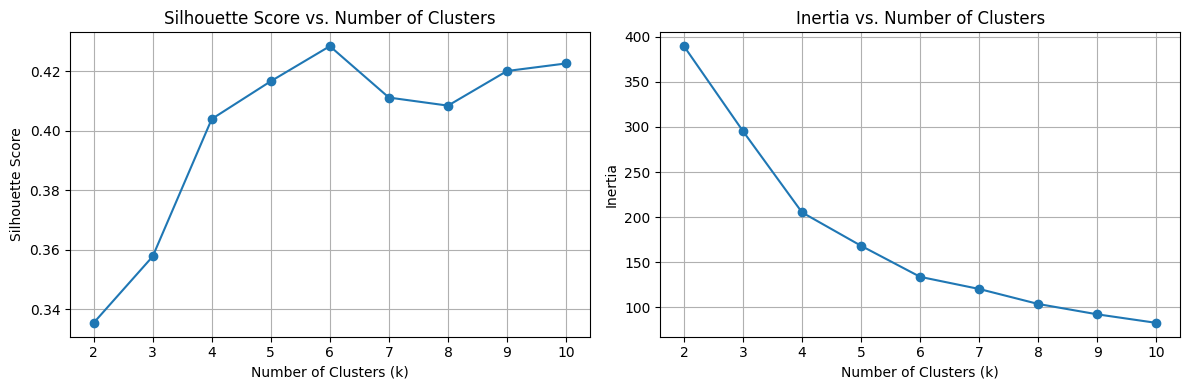

In [ ]:
# Select the features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Choose a range of values for the number of clusters (k)
k_values = range(2, 11)  # Try cluster counts from 2 to 10

# Lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Iterate through different values of k and calculate metrics
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Silhouette Score measures cluster separation and cohesion
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Inertia measures within-cluster sum of squares
    inertia_values.append(kmeans.inertia_)

# Plot Silhouette Score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()

# Plot Inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

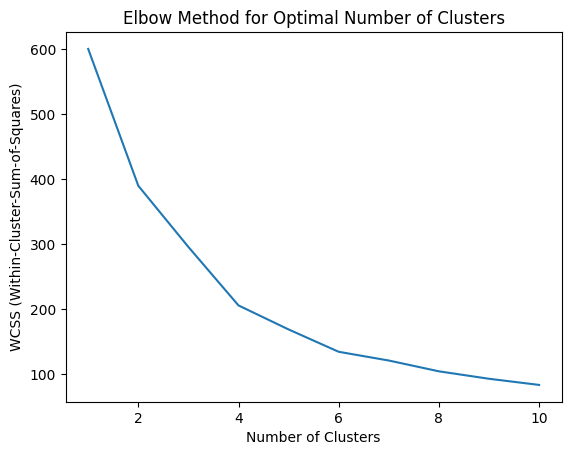

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


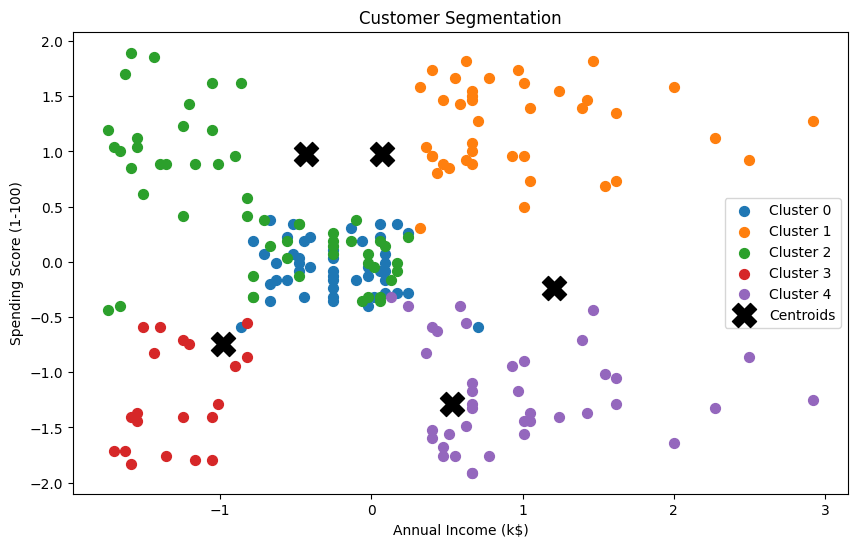

In [ ]:
# Determine the number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

# Based on the Elbow Method, choose 5 clusters

# Initialize and fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Separate data points for each cluster
clusters = []
for cluster_num in range(5):
    clusters.append(df[df['Cluster'] == cluster_num])

# Plot the clusters
plt.figure(figsize=(10, 6))
for i, cluster_df in enumerate(clusters):
    plt.scatter(cluster_df['Annual Income (k$)'], cluster_df['Spending Score (1-100)'],
                label=f'Cluster {i}', s=50)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
